# Relazioni tra variabili casuali che seguono diverse distribuzioni

Alcune delle distribuzioni di probabilità, discrete o continue, sono tra di loro collegate, e si può ottenere una distribuzione a partire dalle altre, nel limite di alcune condizioni.

Vedremo nel seguito quelle più rilevanti.

## Distribuzione binominale e di Poisson

Già abbiamo visto che la distribuzione di Poisson si ottiene come limite di una distribuzione binominale $P(n; N, p)$ nella quale $N\rightarrow\infty$, $p\rightarrow 0$ ma il prodotto $pN=\nu$ resta costante e finito:

$\displaystyle P(n;\nu) = \lim_{N\rightarrow\infty}P(n;N,p)$, $\nu=pN$.



## Distribuzione uniforme e distribuzione binomiale

Immaginiamo una distribuzione uniforme di una variable $x$ nell'intervallo $[a,b\,[$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x = np.random.random(50)

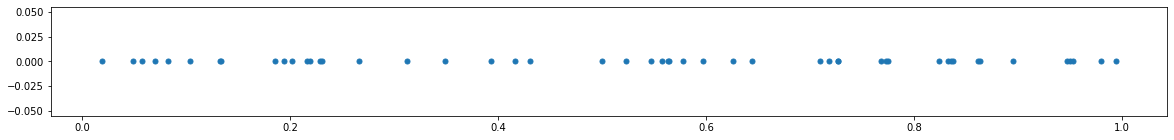

In [3]:
plt.figure(figsize=(20,2))
plt.plot(x, np.zeros(len(x)), '.', markersize=10)
plt.show()

Consideriamo il sottoinsieme dei punti $x\in [a, c[$ con $c<b$

In [4]:
c = 0.2
x1 = x[x<c]

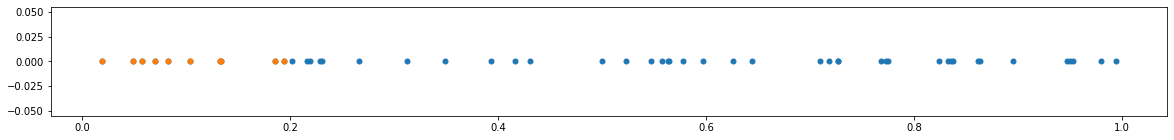

In [5]:
plt.figure(figsize=(20,2))
plt.plot(x, np.zeros(len(x)), '.', markersize=10)
plt.plot(x1, np.zeros(len(x1)), '.', markersize=10)
plt.show()

Contiamo quanti valori $x$ sono minori di $c$.

In [6]:
n = len(x)
n1 = len(x1)
print(n1, " < ", n)

10  <  50


La probabilità che un valore $x$ sia minore di $c$ è pari a $p=c/a$. Per costruzione, il numero $n$ di valori minori di $c$ seguirà una distribuzione bionmiale con parametri $p$, $N$.

Questa volta, a differenza del caso in cui venivano estratte delle sfere, $p$ può essere un qualsiasi valore reale, non necessariamente un numero razionale. Ma questo farà poca differenza dal punto di vista pratico.

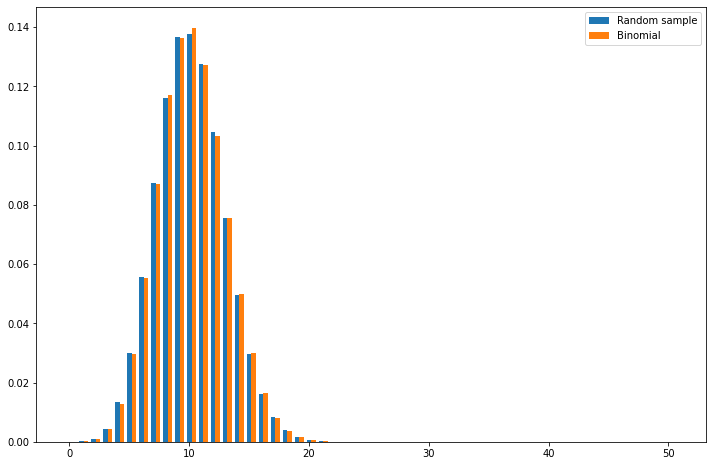

In [7]:
from scipy.stats import binom
from scipy.stats import poisson
plt.figure(figsize=(12,8))
p = c
N = 50
nu = p*N
x = np.arange(N+1)
nn=100000
y1 = np.zeros(N+1)
for n in range(nn):
    x1 = np.random.random(N)
    y1[len(x1[x1<c])]+=1
y1 /=nn
y2 = [binom.pmf(n, N, p) for n in x]
width = 0.4
plt.bar(x,y1,width,label='Random sample')
plt.bar(x+width,y2,width,label='Binomial')
#plt.yscale('log')
plt.legend()
plt.show()

## Distribuzione uniforme e distribuzione poissoniana

Nel caso in cui sia $(c-a)\ll (b-a)$, siamo nelle condizioni in cui la distribuzione di Poisson approssima la distribuzione binomiale.

Immaginiamo di avere un fenomeno uniforme esteso su un intervallo molto ampio, ad esempio la distribuzione della posizione dove cade una goccia di pioggia in un prato. Se sottocampioniamo in un insieme molto più piccolo, ad es.: se contiamo in numero di gocce che cade in un secchio per unità di tempo, il numero sarà distribuito secondo una distribuzione di Poisson. Esempi sono:
* il numero di raggi cosmici che atttraversa un rivelatore in un certo intervallo di tempo
* il numero di automobili che passa attraverso un casello ad una certa ora (da notare che il taso medio è altamente variabile da un giorno all'altro o da un'ora all'altra!)



## Distribuzione uniforme e distribuzione esponenziale

Si può dimostrare che la distribuzione della differenza tra un valore $x_0$ arbitrario ed il *primo valore* $x$ tale che $x>x_0$, tra un certo numero di valori uniformemente distribuiti, segue una distribuzione esponenziale.

Se $x$ è il primo valore dopo $x_0$, significa che non c'è alcun valore prima di $x$ e ce n'è uno solo subito dopo. Siccome l'estrazione di valore nell'intervallo $[x_0,\,x\,[$ in quello successivo $[x, x+\mathrm{d}x[$ sono eventi indipendenti, possiamo scrivere la probabilità di avere il primo valore subito dopo $x$ come:

$\mathrm{d} P(x) = P(0, [x_0,\, x[)\cdot P(1, [x,\, x+\mathrm{d}x[)$

La probabilità di avere $n$ valori nell'intervallo $[x_1, x_2[$ segue la distribuzione di Poisson con un tasso $\nu=r(x_2-x_1)$. Quindi:

$\displaystyle P(0, [x_0,\, x[) = P(0; r(x-x_0))$

$\displaystyle P(1, [x,\, x+\mathrm{d}x[) = P(1; r\,\mathrm{d}x)$


Siccome:

$\displaystyle  P(k;\nu) = \frac{\nu^n e^{-\nu}}{n!}$

avremo:

$\displaystyle P(0, [x_0,\, x\,[) = e^{-r(x - x_0)}$

$\displaystyle P(1, [x,\, x+\mathrm{d}x[) = r\,\mathrm{d}x\, e^{-r\,\mathrm{d}x} \simeq r\,\mathrm{d}x\,$

Quindi:

$\displaystyle \frac{\mathrm{d} P(x)}{\mathrm{d}x} = r\,e^{-r(x-x_0)}$

Il termine $r$ garantisce la giusta normalizzazione della PDF.


In [8]:
x =np.random.random(100)
print(x)
x.sort()
print(x)

[0.73272278 0.59745318 0.30206268 0.59965651 0.54245517 0.31902281
 0.52861008 0.35494421 0.65819545 0.42697707 0.82030712 0.3905097
 0.66572741 0.10814871 0.60549756 0.47708709 0.94290773 0.24196373
 0.11329777 0.13427936 0.39344977 0.34764036 0.81342507 0.40901621
 0.1812194  0.9994334  0.43596389 0.78584597 0.46636901 0.84610079
 0.97311212 0.10529989 0.43821535 0.68831348 0.04206516 0.48730088
 0.76308284 0.87034007 0.58375504 0.02711987 0.54972013 0.15354573
 0.04861071 0.03075724 0.76273302 0.28667305 0.02347774 0.41076172
 0.38493576 0.56412265 0.80370337 0.37057128 0.84702698 0.03717022
 0.83248453 0.46642613 0.72021951 0.31676749 0.98368673 0.00901546
 0.7249405  0.08318283 0.53502376 0.89060919 0.65540098 0.92734561
 0.25699252 0.03708019 0.99944601 0.18168858 0.30785804 0.42485095
 0.59425456 0.5712172  0.55148042 0.74205166 0.43309132 0.09930399
 0.17606565 0.78994853 0.24763502 0.86499541 0.62246374 0.78182733
 0.27938268 0.64840194 0.29785257 0.05795165 0.23691382 0.01179

In [9]:
from scipy.ndimage.interpolation import shift
x_shift = shift(x, -1, cval=np.NaN)
x_shift

array([0.01179614, 0.02347774, 0.02711987, 0.03075724, 0.03708019,
       0.03717022, 0.04206516, 0.04861071, 0.05795165, 0.08318283,
       0.09930399, 0.10529989, 0.10814871, 0.11329777, 0.13427936,
       0.15354573, 0.16762588, 0.17606565, 0.1812194 , 0.18168858,
       0.18790916, 0.23691382, 0.24196373, 0.24763502, 0.25699252,
       0.27835845, 0.27938268, 0.28247942, 0.28667305, 0.29785257,
       0.30206268, 0.30785804, 0.31676749, 0.31902281, 0.34764036,
       0.35494421, 0.37057128, 0.38493576, 0.3905097 , 0.39344977,
       0.40901621, 0.41076172, 0.42485095, 0.42697707, 0.43309132,
       0.43596389, 0.43821535, 0.46636901, 0.46642613, 0.47708709,
       0.48730088, 0.49419554, 0.52861008, 0.53502376, 0.54245517,
       0.54972013, 0.55148042, 0.56412265, 0.5712172 , 0.58375504,
       0.59425456, 0.59745318, 0.59965651, 0.60549756, 0.62246374,
       0.64840194, 0.65540098, 0.65819545, 0.66572741, 0.68831348,
       0.72021951, 0.7249405 , 0.73272278, 0.74205166, 0.75796

In [10]:
dx = (x_shift-x)[:-1]
dx

array([2.78067097e-03, 1.16816013e-02, 3.64213399e-03, 3.63736826e-03,
       6.32295284e-03, 9.00245810e-05, 4.89493926e-03, 6.54555701e-03,
       9.34094034e-03, 2.52311723e-02, 1.61211671e-02, 5.99589671e-03,
       2.84881705e-03, 5.14905944e-03, 2.09815949e-02, 1.92663688e-02,
       1.40801500e-02, 8.43977417e-03, 5.15374285e-03, 4.69188137e-04,
       6.22057643e-03, 4.90046633e-02, 5.04990851e-03, 5.67129203e-03,
       9.35749577e-03, 2.13659270e-02, 1.02422959e-03, 3.09674394e-03,
       4.19362661e-03, 1.11795247e-02, 4.21010324e-03, 5.79536761e-03,
       8.90944628e-03, 2.25531567e-03, 2.86175596e-02, 7.30384702e-03,
       1.56270686e-02, 1.43644788e-02, 5.57394137e-03, 2.94006888e-03,
       1.55664363e-02, 1.74551365e-03, 1.40892275e-02, 2.12612307e-03,
       6.11425070e-03, 2.87256684e-03, 2.25145970e-03, 2.81536652e-02,
       5.71224941e-05, 1.06609501e-02, 1.02137957e-02, 6.89466118e-03,
       3.44145389e-02, 6.41367424e-03, 7.43141702e-03, 7.26496013e-03,
      

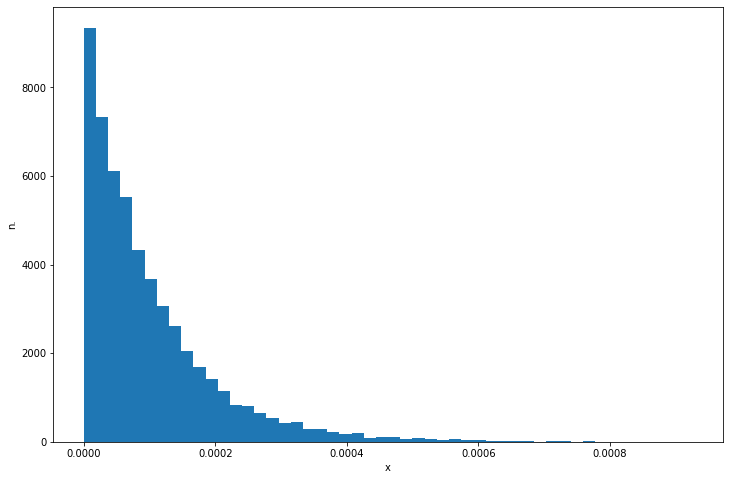

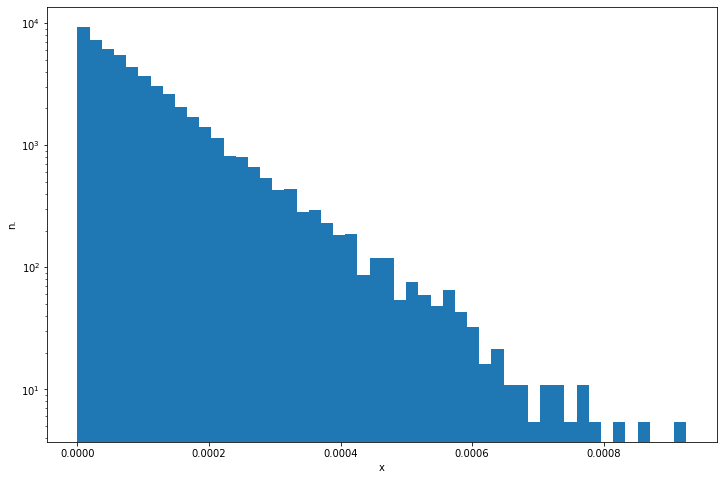

In [11]:
x=np.random.random(10000)
x.sort()
dx = (shift(x, -1, cval=np.NaN)-x)[:-1]

plt.figure(figsize=(12,8))
plt.hist(dx, bins=50,density=True)
plt.xlabel('x')
plt.ylabel('n.')
plt.show()

plt.figure(figsize=(12,8))
plt.hist(dx, bins=50,density=True)
plt.xlabel('x')
plt.ylabel('n.')
plt.yscale('log')
plt.show()

# Approssimazione poissoniana di una binomiale

Come abbiamo già visto, per $p \ll 1$, una binomiale può essere approssimata con una poissoniana che abbia $\nu=pN$.

Va notato che via via che $p$ aumenta, l'approssimazione diventra sempre meno accurata.

<span style="color:blue;">Nota: siccome la distribuzione di $N-n$ è una binomiale con parametri $N$ e $1-p$, si potrà approssimare la distribuzione di $N-n$ con una poissoniana se $1-p \ll 1$.</span>

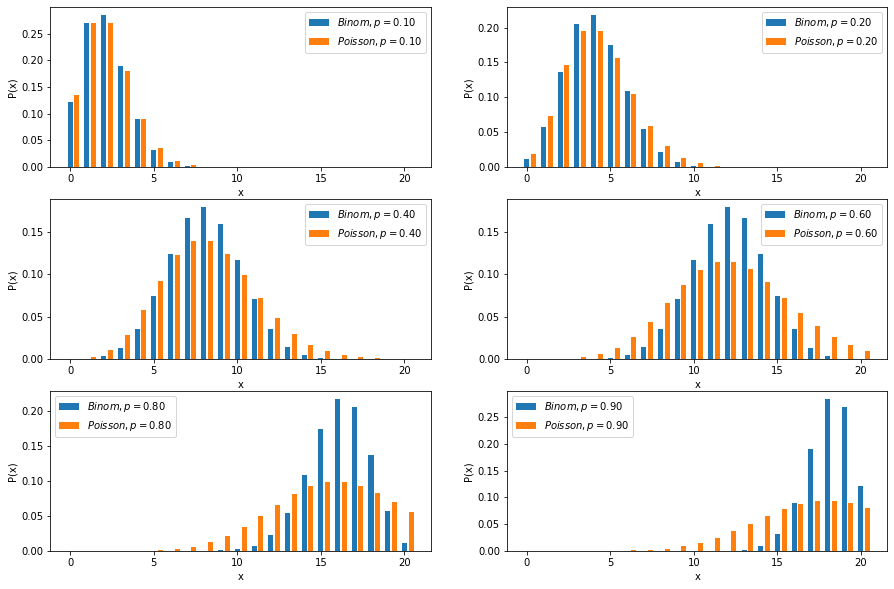

In [12]:
N = 20
x = np.arange(N+1)
fig, axs = plt.subplots(3, 2, figsize=(15,10))
for p, ax in zip([0.1, 0.2, 0.4, 0.6, 0.8, 0.9], axs.reshape(-1)):
    y = [binom.pmf(n, N, p) for n in x]
    y1 = [poisson.pmf(n, p*N) for n in x]
    ax.bar(x,y,width=0.3,label='$Binom, p={:.2f}$'.format(p))
    ax.bar(x+0.4,y1,width=0.3,label='$Poisson, p={:.2f}$'.format(p))
    ax.set_xlabel('x')
    ax.set_ylabel('P(x)')
    ax.legend()
plt.show()

## Somma di variabili binomiali

La somma di due variabili binomiali $n_1$, distribuita con parametri $N_1$ e $p_1=p$, e $n_2$, distribuita con parametri $N_2$ e $p_2=p$, è ancora distribuita secondo una distribuzione poissoniana con parametri $N_1+N_2$ e $p$.

La dimostrazione è lasciata allo studioso lettore.

Se invece $p_1\neq p_2$ la distribuzione di $n_1+n_2$ non è necessariamente una binomiale.

## Somma di variabili poissoniane

La somma di due variabili poissoniane $n_1$, distribuita con valor medio $\nu_1$, e $n_2$, distribuita con valor medio $\nu_2$, è ancora distribuita secondo una distribuzione poissoniana con valor medio $\nu_1+\nu_2$.

La dimostrazione è lasciata allo studioso lettore.

Esempi:
* In un campo ci sono funghi chiodini e porcini con un numero medio di chiodini pari a 3 funghi per metri quadro e di porcini pari a 0.2 funghi a metro quadro. Il numero di funghi in un metro quadrato è distribuito poissonianamente con un valor medio di funghi pari a 2.3 funghi a metro quadro (chiodini o porcini che siano).
* Un fascio di particelle indirizzato verso un bersaglio produce elettroni con un tasso di $3.1\times 10^3$ particelle al econdo e di muoni con un tasso di $4\times 10^2$ particelle al secondo. Il numero totale di leptoni (=eletroni o muoni) al secondo è $3.5\times 10^3$ leptoni al secondo, distribuiti in modo poissoniano.

## Binomiale e poissoniana in approssimazione gaussiana

Si puà anche dimostrare, ma lo faremo solo numericamente, che le distribuzioni binomiale e poissoniana possono essere approssimate con una gaussiana in diversi casi. I parametri $\mu$ e $\sigma$ della gaussiana vanno posti uguali al valor medio ed alla deviazione standard della distribuzione binomiale o poissoniana.

Le condizioni per l'approssimazione gaussiana sono:
* $N p \gg 1$ e $N (1-p) \gg 1$ per la binominale
* $\nu\gg 1$ per la poissoniana

Questo è comprensibile, poiché, per valori grandi di $N$, per una binomiale, o $\nu$, per una poissoniana, la distribuzione si può ottenere come la somma di $k$ variabili tali che $N_1+\cdots +N_k = N$, oppure $\nu_1+\cdots+\nu_k=\nu$. Per il teorema del limite centrale, la somma ha una distibuzione che si avvicinia ad una gaussiana man mano che $k$ cresce.

Nella pratica, basta che questi valori siano almeno $\simeq$5 o più per avere un'approssimazione ragionevole.

In [13]:
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import poisson
import math

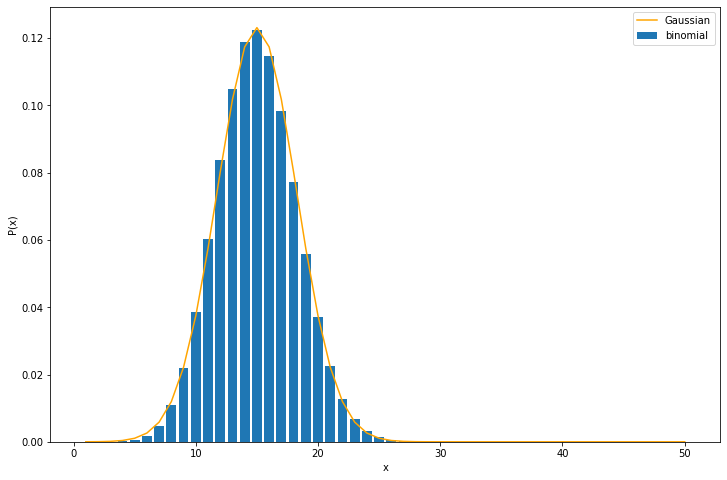

In [14]:
plt.figure(figsize=(12,8))
N=50
p=0.3
mu=N*p
sigma=math.sqrt(N*p*(1-p))
x=np.arange(1,N+1,1)
y=binom.pmf(x,N,p)
y1=norm.pdf(x,scale=sigma,loc=mu)
plt.bar(x,y,label='binomial')
plt.plot(x,y1,color='orange',label='Gaussian')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.legend()
plt.show()

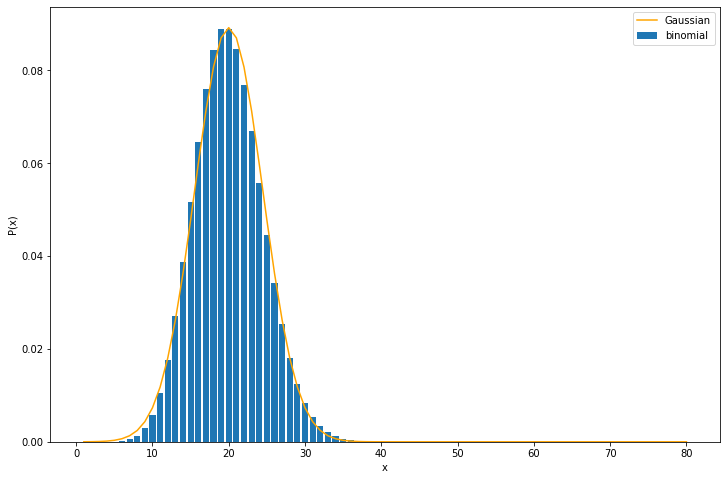

In [15]:
plt.figure(figsize=(12,8))
nu=20
mu=nu
sigma=math.sqrt(nu)
x=np.arange(1,4*nu+1,1)
y=poisson.pmf(x,nu)
y1=norm.pdf(x,scale=sigma,loc=mu)
plt.bar(x,y,label='binomial')
plt.plot(x,y1,color='orange',label='Gaussian')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.legend()
plt.show()

## Combinazione di una binomiale ed una poissoniana

Un processo in cui si estrae una variabile $n$ distribuita in maniera binomiale con probabilità $p$ e numero massimo di casi $N$ a sua volta distribuito secondo una distribuzione poissoniana con valor medio $\nu$ è distribuita a sua volta in modo poissoniano con valor medio $p \nu$.

La dimostrazione è lasciata allo studioso lettore.

Esempi:
* Un rivelatore produce un segnale al passaggio di un raggio cosmico con efficienza $\varepsilon=0.92$. Il tasso di raggi cosmici che attraversa il rivelatore è pari a $120$ particelle al minuto. Il numero di segnali rivelati sarà pari a $0.92\cdot 120=110.4$ al secondo, con una distribuzione poissoniana.

## Poisson e Gauss

Per $\nu$ sufficientemente grande, una poissoninaa può essere approssimata con una gaussiana con media $\nu$ e deviazoine standard $\sqrt{\nu}$.

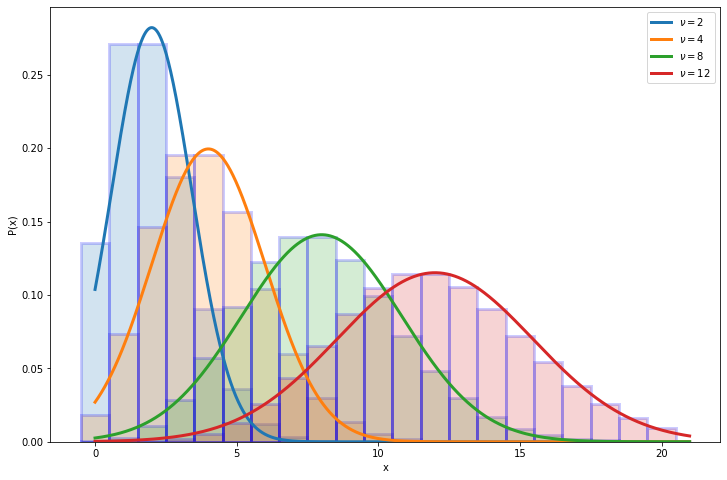

In [16]:
plt.figure(figsize=(12,8))
N = 20
x = list(range(N+1))
xs = np.arange(0,N+1,0.01)
for nu in [2, 4, 8, 12]:
    y = [poisson.pmf(n, nu) for n in x]
    plt.bar(x,y,width=1,alpha=0.2,linewidth=3,linestyle='-',edgecolor='blue')
    ys = norm.pdf(xs,nu,math.sqrt(nu))
    plt.plot(xs,ys,linewidth=3, label=r'$\nu={:d}$'.format(nu))
plt.xlabel('x')
plt.ylabel('P(x)')
plt.legend()
plt.show()

## Binomiale e Gauss

Per $N$ sufficientemente grande e per $p$ lontano da 0 e 1, una binomiale può essere approssimata con una gaussiana con media $p N$ e deviazoine standard $\sqrt{p(1-p)N}$.

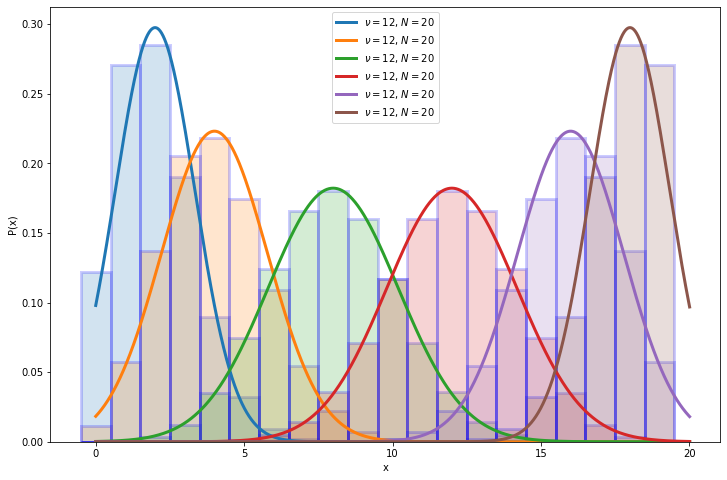

In [17]:
plt.figure(figsize=(12,8))
N = 20
x = list(range(N))
xs = np.arange(0,N+0.01,0.01)
for p in [0.1, 0.2, 0.4, 0.6, 0.8, 0.9]:
    y = [binom.pmf(n, N, p) for n in x]
    plt.bar(x,y,width=1,alpha=0.2,linewidth=3,linestyle='-',edgecolor='blue')
    ys = norm.pdf(xs,p*N,math.sqrt(p*(1-p)*N))
    plt.plot(xs,ys,linewidth=3, label=r'$\nu={:d}$, $N={:d}$'.format(nu,N))
plt.xlabel('x')
plt.ylabel('P(x)')
plt.legend()
plt.show()

## Spunti per esercizi

* Un telescopio per raggi cosmici è fatto da 5 piani di scintillatori, tutti con la stessa efficienza $\varepsilon$. Discutere la distribuzione del:
    1. numero di conteggi di raggi cosmici per i quali scatti un trigger che richieda il segnale da almeno 3 piani in un certo intervallo di tempo $T$.
    * numero di conteggi di raggi cosmici selezioniati dal trigger rispetto al numero totale di raggi cosmici che passa per i 5 piani nel tempo $T$.